# Moving Average

Future value of our variable depends on average of its <b>k</b> previous values.<br>
Thus it is called <b>Moving Average</b>.
<br><br>
Unfortunately we cannot make predictions far in the future.<br>
Because in order to get the value for the next step, we need the previous values to be actually observed. <br> 
<br>
But <b>Moving Average</b> has another use case- <br>
Smoothening the Original Time Series to identify the trends. Pandas has an implementation available with <b>DataFrame.rolling(window).mean()</b>. <br><br>

The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv',parse_dates=['Month'],index_col='Month')
df.columns=['Volume']
df.reset_index(drop=True,inplace=True)
df.head()

,Volume
0,112
1,118
2,132
3,129
4,121


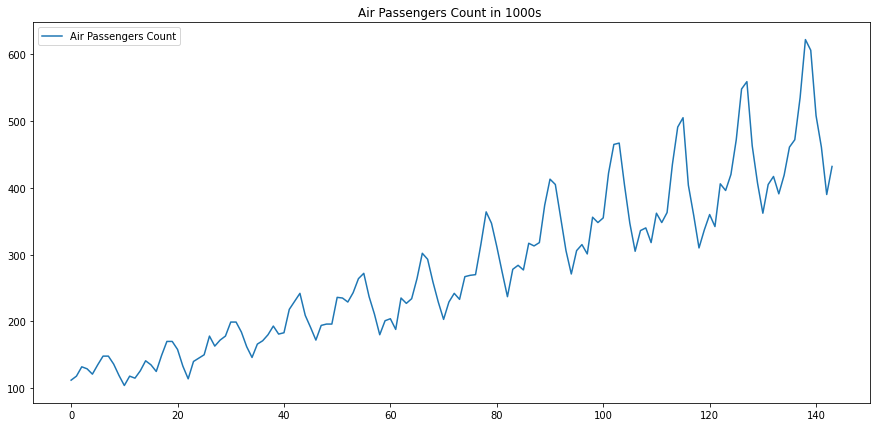

In [3]:
plt.figure(figsize=(15,7))
plt.plot(df,label='Air Passengers Count')
plt.title('Air Passengers Count in 1000s ')
plt.legend()
plt.show()

We can see that the series clearly moving upward slowly along with some seasonality.
<br> Sometimes we cannot clearly see the trend/seasonality, so we smoothe the series so as to clearly see the trend,patterns and seasonality as well.. 

In [4]:
def moving_average(series,window=3):
    
    # Create a empty dataframe( NA values) of size same as given input series..
    ma_df = pd.DataFrame(np.nan,index=list(range(len(series))),columns=['values'])
    
    for i in range(window,len(series)):
        ma_df.loc[i,'values'] = series[i-window:i].mean()
        
    return ma_df

In [5]:
ma_df  = moving_average(df.Volume,4)
ma_df

,values
0,NaN
1,NaN
2,NaN
3,NaN
4,122.75
...,...
139,522.50
140,558.75
141,567.75
142,549.25


### Compare Calculated Moving Average with Pandas Rolling Mean Function

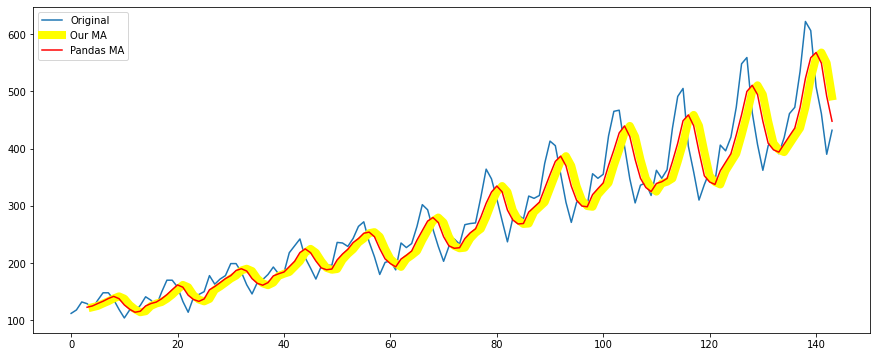

In [6]:
plt.figure(figsize=(15,6))
plt.plot(df.Volume.values,label='Original')
plt.plot(ma_df.dropna(),label='Our MA',color='yellow',linewidth =8)
plt.plot(df.Volume.rolling(window=4).mean().dropna(),label='Pandas MA',color='red')
plt.legend()
plt.show()

### Visualize the trend

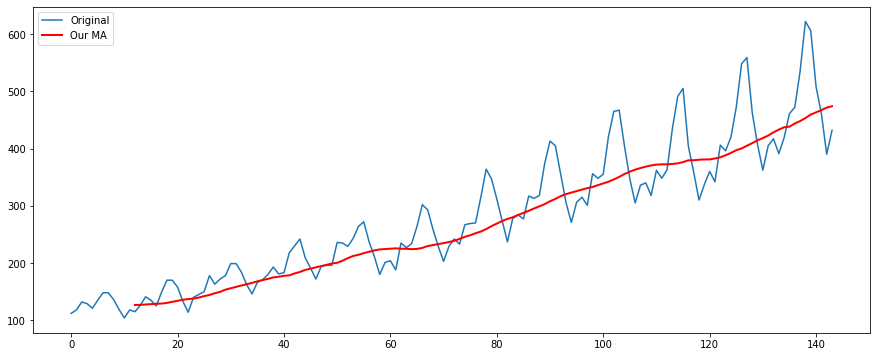

In [7]:
ma_df  = moving_average(df.Volume,12) 
plt.figure(figsize=(15,6))
plt.plot(df.Volume.values,label='Original')
plt.plot(ma_df.dropna(),label='Our MA',color='red',linewidth =2)
plt.legend()
plt.show()